In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.datasets as dsets
from random import randint
from collections import OrderedDict
from torch.autograd import Variable

In [ ]:
# check GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
pre_process = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [ ]:
training_data = dsets.CIFAR10(root='./data', train=True, transform=pre_process, download=True)
testing_data = dsets.CIFAR10(root='./data', train=False, transform=pre_process)

Files already downloaded and verified


In [ ]:
train_data_loader = DataLoader(dataset=training_data, batch_size=64, shuffle=True)
test_data_loader = DataLoader(dataset=testing_data, batch_size=64, shuffle=False)

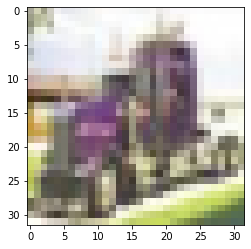

In [ ]:
img_num = randint(0,training_data.data.shape[0])
plt.imshow(training_data.data[img_num], cmap='gray')

In [ ]:
model = models.resnet18(pretrained=True)

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
logistic_layer = nn.Sequential(OrderedDict([
    ('fct1', nn.Linear(512,100)),
    ('relu_t1', nn.ReLU()),
    ('fct2', nn.Linear(100,10)),
    ('relu_t2', nn.ReLU()),
    ('output', nn.Softmax())
]))

In [ ]:
model.fc = logistic_layer

In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001,amsgrad=True,weight_decay=5e-4)

In [ ]:
from tqdm.notebook import tqdm_notebook
import gc
gc.collect()

278

In [ ]:
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for epoch in range(100):
  train_loss =0
  acc_arr=[]
  loss_arr = []
  for i, (images,labels) in enumerate(tqdm_notebook(train_data_loader)):
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()

    prediction = model(images)
    output_loss = loss(prediction,labels)
    output_loss.backward()
    optimizer.step()
    
    # Print model loss
    #train_loss += output_loss.item() 
    
  print("Epoch:",epoch," --- LOSS:",output_loss)
  correct = 0
  total = 0
  # TESTING ACCURACY OB TEST IMAGES
  for images, labels in test_data_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total+= labels.size(0)
    # for gpu, bring the predicted and labels back to cpu fro python operations to work
    correct+= (predicted == labels).sum()
  accuracy = 100 * correct.item()/total
  acc_arr.append(accuracy)
  loss_arr.append(output_loss.item())
  print("Loss: {}. Accuracy: {}.".format(output_loss.item(), accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



Epoch: 0  --- LOSS: tensor(1.7097, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.709661841392517. Accuracy: 77.59.



Epoch: 1  --- LOSS: tensor(1.6038, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.6037603616714478. Accuracy: 77.59.



Epoch: 2  --- LOSS: tensor(1.5733, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.573310136795044. Accuracy: 77.79.



Epoch: 3  --- LOSS: tensor(1.6124, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.6124275922775269. Accuracy: 78.92.



Epoch: 4  --- LOSS: tensor(1.6401, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.6401259899139404. Accuracy: 77.87.



Epoch: 5  --- LOSS: tensor(1.7059, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.7058568000793457. Accuracy: 78.26.



Epoch: 6  --- LOSS: tensor(1.7319, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.731878399848938. Accuracy: 79.49.



Epoch: 7  --- LOSS: tensor(1.7184, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.7183917760849. Accuracy: 77.98.



Epoch: 8  --- LOSS: tensor(1.8135, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.8134710788726807. Accuracy: 78.98.



Epoch: 9  --- LOSS: tensor(1.5970, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.5969719886779785. Accuracy: 78.62.



Epoch: 10  --- LOSS: tensor(1.9218, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.9217841625213623. Accuracy: 77.47.



Epoch: 11  --- LOSS: tensor(1.7223, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.722292423248291. Accuracy: 79.86.



Epoch: 12  --- LOSS: tensor(1.6065, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.6064729690551758. Accuracy: 79.9.



Epoch: 13  --- LOSS: tensor(1.7526, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.7525866031646729. Accuracy: 79.3.



Epoch: 14  --- LOSS: tensor(1.7150, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.7150006294250488. Accuracy: 79.34.



Epoch: 15  --- LOSS: tensor(1.8907, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.8906739950180054. Accuracy: 78.09.



Epoch: 16  --- LOSS: tensor(1.5850, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.5850021839141846. Accuracy: 79.33.



Epoch: 17  --- LOSS: tensor(1.5753, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.5752596855163574. Accuracy: 78.04.



Epoch: 18  --- LOSS: tensor(1.7235, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.7235126495361328. Accuracy: 79.22.



Epoch: 19  --- LOSS: tensor(1.6881, device='cuda:0', grad_fn=<NllLossBackward>)
Loss: 1.6881475448608398. Accuracy: 78.71.


used adam optimizer as it converges faster than SGD.
learning rate is 0.01 based on experimentation
batch size= 64 as img size is small and 64 batch size is sufficient
epoch =10 as model seem to perform efficiently in just 10 epochs

In [ ]:
test_data_loader2 = DataLoader(dataset=testing_data, batch_size=1, shuffle=False)

In [ ]:
import pandas as pd
import sys

In [ ]:
model.eval()

In [ ]:
df = pd.DataFrame(columns=["label","prediction","probability","image"])
for img, labl in tqdm_notebook(test_data_loader):
   labl=labl.item()
   output = model(img.to(device))
   pred = torch.argmax(output).item()
   pred_prob = output[0][labl].item()
   img = img / 2 + 0.5
   img = img.numpy()[0]
   df = df.append({"label":labl,"prediction":pred,"probability":pred_prob,"image":img},ignore_index=True)

In [ ]:
df

In [ ]:
df_worst = df.groupby(["label"]).apply(lambda x: x.sort_values(["probability"])).reset_index(drop=True).groupby(["label"]).head(5)
df_best = df.groupby(["label"]).apply(lambda x: x.sort_values(["probability"],ascending=False)).reset_index(drop=True).groupby(["label"]).head(5)

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
mapping_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
fig = plt.figure(figsize=(50., 50.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(10, 5),  
                 axes_pad=0.5, 
                 )

for ax, row in zip(grid,df_best.iterrows() ):  
    ax.imshow(np.transpose(row[1]["image"],(1, 2, 0)))
    ax.set_title(mapping_dict[row[1]["prediction"]],{"fontsize":30})
plt.show()

In [ ]:
fig = plt.figure(figsize=(50., 50.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(10, 5),  
                 axes_pad=0.5, 
                 )

for ax, row in zip(grid,df_worst.iterrows() ):  
    ax.imshow(np.transpose(row[1]["image"],(1, 2, 0)))
    ax.set_title(mapping_dict[row[1]["prediction"]],{"fontsize":30})

plt.axis("off")
plt.show()

Output hidden; open in https://colab.research.google.com to view.